In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import logit
from sklearn.preprocessing import MinMaxScaler

In [56]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [57]:
df = pd.read_excel("data.xlsx", index_col='Serial_no')
df = df.drop(columns=['Q_1'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv,Fat_Occu_Coded,Mot_Occu_coded,Income_Coded,Age_Coded
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Seniors,Dead,Yes,Primary,Less,Bad,Rural,No,Average,Business,Housewife,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Business,Housewife,Lower Middle Income,Adult
2,Female,26,10,115000,Dead,Dead,Yes,Primary,Very much,Good,Rural,No,Average,Business,Housewife,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Neutral,Disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Agree,Business,Housewife,Lower Middle Income,Adult
3,Female,26,6,120000,Seniors,Adults,Yes,Primary,Very much,Good,Urban,No,Average,Business,Business,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Strongly disagree,Disagree,Disagree,Disagree,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Neutral,Business,Business,Lower Middle Income,Adult


In [58]:
for i in [i for i in df.columns if df[i].dtype=='object']:
    print(pd.crosstab(index=df[i], columns=df['Drop_out']))
    print("------------------")

Drop_out  No  Yes
Q_2              
Female    29   46
Male      37   98
------------------
Drop_out  No  Yes
Q_6              
Adults    63  119
Dead       0    4
Seniors    0   14
------------------
Drop_out  No  Yes
Q_7              
Adults    66  141
Dead       0    3
------------------
Drop_out  No  Yes
Drop_out         
No        66    0
Yes        0  144
------------------
Drop_out          No  Yes
Q_8                      
Higher Education  25    7
Primary           24   93
Secondary         17   44
------------------
Drop_out   No  Yes
Q_9               
Less        5   41
Neutral     9   18
Very much  52   85
------------------
Drop_out  No  Yes
Q_10             
Average   11   73
Bad        2   16
Good      53   55
------------------
Drop_out  No  Yes
Q_11             
Rural     36  117
Urban     30   27
------------------
Drop_out        No  Yes
Q_12                   
No               0   91
Not Applicable  66    0
Yes              0   53
------------------
Drop_out  No  Ye

In [59]:
df = df.drop(columns=['Q_6', 'Q_7', 'Q_10', 'Q_12', 'Q_14', 'Q_15', 'Q_17', 'Q_20', 'Q_37_i', 'Q_37_iii', 'Q_37_iv', 'Q_37_vi', 'Q_37_vii', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv', 'Mot_Occu_coded'])

In [60]:
data = df.copy()
data.head(2)

,Q_2,Q_3,Q_4,Q_5,Drop_out,Q_8,Q_9,Q_11,Q_13,Q_16,Q_18,Q_19,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_ii,Q_37_v,Q_37_viii,Q_37_ix,Fat_Occu_Coded,Income_Coded,Age_Coded
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Yes,Primary,Less,Rural,Average,No,7,6,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Business,Lower Middle Income,Adult
2,Female,26,10,115000,Yes,Primary,Very much,Rural,Average,Yes,8,7,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Business,Lower Middle Income,Adult


In [61]:
sig_factors = []

for i in [i for i in df.columns if df[i].dtype=='object']:
    crs = pd.crosstab(index=data['Drop_out'], columns=data[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    if p<0.05:
        sig_factors.append(i)

sig_factors += [i for i in df.columns if df[i].dtype!='object']
print(sig_factors)

['Drop_out', 'Q_8', 'Q_9', 'Q_11', 'Q_13', 'Q_16', 'Q_21', 'Q_23', 'Q_24', 'Q_27', 'Q_29', 'Q_31', 'Q_34', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_vi', 'Q_36', 'Fat_Occu_Coded', 'Income_Coded', 'Age_Coded', 'Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']


In [62]:
in_sig = [i for i in data.columns if i not in sig_factors and i != 'Drop_out']
print(in_sig)
data = data.drop(columns=in_sig)
data.dtypes.value_counts()

['Q_2', 'Q_22', 'Q_25', 'Q_26', 'Q_28', 'Q_30', 'Q_32', 'Q_33', 'Q_35_i', 'Q_35_v', 'Q_37_ii', 'Q_37_v', 'Q_37_viii', 'Q_37_ix']


object    21
int64      5
dtype: int64

In [63]:
# cat = [i for i in data.columns if data[i].dtype=='object']
data = pd.get_dummies(data, columns=['Drop_out'], drop_first=True)
data.head(3)

,Q_3,Q_4,Q_5,Q_8,Q_9,Q_11,Q_13,Q_16,Q_18,Q_19,Q_21,Q_23,Q_24,Q_27,Q_29,Q_31,Q_34,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_vi,Q_36,Fat_Occu_Coded,Income_Coded,Age_Coded,Drop_out_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,
1,27,8,150000,Primary,Less,Rural,Average,No,7,6,Yes,No,No,Rural,Good,Public,Neutral,No,No,No,No,Yes,Business,Lower Middle Income,Adult,1
2,26,10,115000,Primary,Very much,Rural,Average,Yes,8,7,No,No,Yes,Rural,Good,Public,Yes,No,No,No,Yes,Yes,Business,Lower Middle Income,Adult,1
3,26,6,120000,Primary,Very much,Urban,Average,No,4,4,Yes,No,Yes,Urban,Good,Private,Yes,No,No,No,Yes,Yes,Business,Lower Middle Income,Adult,1


In [64]:
data = data.drop(columns=["Q_35_iii", "Q_35_iv"])

In [66]:
fs = "Drop_out_Yes ~ "
for i in data.columns:
    if i != "Drop_out_Yes":
        fs = fs + " + " + i
    
print(fs)

Drop_out_Yes ~  + Q_3 + Q_4 + Q_5 + Q_8 + Q_9 + Q_11 + Q_13 + Q_16 + Q_18 + Q_19 + Q_21 + Q_23 + Q_24 + Q_27 + Q_29 + Q_31 + Q_34 + Q_35_ii + Q_35_vi + Q_36 + Fat_Occu_Coded + Income_Coded + Age_Coded


In [67]:
log_reg = logit(formula=fs, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.121369
         Iterations 13


In [68]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Drop_out_Yes   No. Observations:                  210
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                           32
Date:                Wed, 11 Jan 2023   Pseudo R-squ.:                  0.8050
Time:                        13:00:34   Log-Likelihood:                -25.488
converged:                       True   LL-Null:                       -130.72
Covariance Type:            nonrobust   LLR p-value:                 3.793e-28
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             -15.3606     17.939     -0.856      0.392     -50.519      19.798
Q_8[T.Primary]                          7.8716      2.865      2.748      0.006       2.257      13.486
Q_8[T.Secondary]                       10.0401      3.685      2.725      0.006       2.818      17.263
Q_9[T.Neutral]                         -5.6676      2.931     -1.934      0.053     -11.412       0.077
Q_9[T.Very much]                       -0.4575      1.469     -0.311      0.755      -3.336       2.421
Q_11[T.Urban]                          -1.4323      2.272     -0.630      0.528      -5.886       3.021
Q_13[T.Bad]                             8.0335      4.370      1.838      0.066      -0.531      16.598
Q_13[T.Good]                            0.5025      1.354      0.371      0.711      -2.152       3.157
Q_16[T.Yes]                             1.5084      1.586      0.951      0.341      -1.599       4.616
Q_21[T.Yes]                             0.4567      1.640      0.279      0.781      -2.757       3.670
Q_23[T.Yes]                             1.3895      1.528      0.910      0.363      -1.604       4.383
Q_24[T.Yes]                             6.2408      2.701      2.310      0.021       0.946      11.536
Q_27[T.Urban]                          -5.0267      2.808     -1.790      0.073     -10.530       0.476
Q_29[T.Good]                           -4.3466      9.029     -0.481      0.630     -22.044      13.351
Q_29[T.Neutral]                        -0.7907      9.104     -0.087      0.931     -18.634      17.053
Q_31[T.Public]                         -4.4160      2.049     -2.156      0.031      -8.431      -0.401
Q_34[T.No]                              9.3524      3.652      2.561      0.010       2.195      16.510
Q_34[T.Yes]                             8.1998      3.672      2.233      0.026       1.003      15.396
Q_35_ii[T.Yes]                          5.6659      3.519      1.610      0.107      -1.232      12.563
Q_35_vi[T.Yes]                         -8.9247      3.139     -2.843      0.004     -15.076      -2.773
Q_36[T.Yes]                            -3.6512      1.735     -2.105      0.035      -7.051      -0.252
Fat_Occu_Coded[T.Farmer]               -1.0209      1.407     -0.726      0.468      -3.778       1.736
Fat_Occu_Coded[T.Job]                  -9.2403      3.611     -2.559      0.011     -16.319      -2.162
Fat_Occu_Coded[T.Others]                0.4096      1.581      0.259      0.796      -2.689       3.508
Income_Coded[T.Lower Middle Income]    -5.7895      2.238     -2.587      0.010     -10.176      -1.404
Income_Coded[T.Upper Middle Income]    -5.6433      5.393     -1.046      0.295     -16.213       4.926
Age_Coded[T.Chidren]                    2.7139      5.357      0.507      0.612      -7.785      13.213
Age_Coded[T.Youth]                      0.5762      2.881      0.200      0.841      -5.071       6.223
Q_3              

In [69]:
model_odds = pd.DataFrame(np.exp(log_reg.params), columns= ['OR'])
model_odds['p-value']= log_reg.pvalues
model_odds[['Lower', 'Upper']] = np.exp(log_reg.conf_int())
model_odds

,OR,p-value,Lower,Upper
Intercept,2.132880e-07,0.391836,1.147301e-22,3.965114e+08
Q_8[T.Primary],2.621799e+03,0.006000,9.552683e+00,7.195708e+05
Q_8[T.Secondary],2.292749e+04,0.006439,1.673514e+01,3.141112e+07
Q_9[T.Neutral],3.456123e-03,0.053137,1.106333e-05,1.079674e+00
Q_9[T.Very much],6.328742e-01,0.755458,3.556370e-02,1.126232e+01
Q_11[T.Urban],2.387601e-01,0.528449,2.779208e-03,2.051174e+01
Q_13[T.Bad],3.082370e+03,0.065999,5.879826e-01,1.615865e+07
Q_13[T.Good],1.652783e+00,0.710606,1.162871e-01,2.349091e+01
Q_16[T.Yes],4.519702e+00,0.341456,2.020113e-01,1.011216e+02
Q_21[T.Yes],1.578776e+00,0.780614,6.349197e-02,3.925748e+01


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [39]:
features = ["Q_5", "Q_19", "Q_8", "Q_13", "Q_16"]

In [40]:
X = df[features]
y = df[['Drop_out']]
y.head(2)

,Drop_out
Serial_no,
1,Yes
2,Yes


In [41]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head(3)

,Q_5,Q_19,Q_8_Primary,Q_8_Secondary,Q_13_Bad,Q_13_Good,Q_16_Yes
Serial_no,,,,,,,
1,1.715909,6,1,0,0,0,0
2,1.357955,7,1,0,0,0,1
3,1.409091,4,1,0,0,0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.25, random_state = 0)

In [43]:
print(X_train.shape)
print(X_test.shape)

(157, 7)
(53, 7)


In [44]:
acc_dict = {
    'name': [],
    'accuracy': []
}

In [45]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
pred = dt.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("Decision Tree")
acc_dict['accuracy'].append(ac)
print("Decision Tree")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

Decision Tree
Accuracy -> 77.36 %

              precision    recall  f1-score   support

          No       0.67      0.59      0.62        17
         Yes       0.82      0.86      0.84        36

    accuracy                           0.77        53
   macro avg       0.74      0.72      0.73        53
weighted avg       0.77      0.77      0.77        53



In [46]:
svm = SVC(kernel='rbf')
svm = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("SVM")
acc_dict['accuracy'].append(ac)
print("Support Vector Machine")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

Support Vector Machine
Accuracy -> 83.02 %

              precision    recall  f1-score   support

          No       0.83      0.59      0.69        17
         Yes       0.83      0.94      0.88        36

    accuracy                           0.83        53
   macro avg       0.83      0.77      0.79        53
weighted avg       0.83      0.83      0.82        53



In [47]:
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
pred = rf.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("Random Forest")
acc_dict['accuracy'].append(ac)
print("Random Forest")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)


Random Forest
Accuracy -> 83.02 %

              precision    recall  f1-score   support

          No       0.79      0.65      0.71        17
         Yes       0.85      0.92      0.88        36

    accuracy                           0.83        53
   macro avg       0.82      0.78      0.79        53
weighted avg       0.83      0.83      0.83        53



In [48]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
pred = lr.predict(X_test)
ac = accuracy_score(y_test, pred)
cr = classification_report(y_test, pred)
acc_dict['name'].append("LR")
acc_dict['accuracy'].append(ac)
print("LR")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

LR
Accuracy -> 88.68 %

              precision    recall  f1-score   support

          No       0.87      0.76      0.81        17
         Yes       0.89      0.94      0.92        36

    accuracy                           0.89        53
   macro avg       0.88      0.85      0.87        53
weighted avg       0.89      0.89      0.88        53



In [185]:
from xgboost import XGBClassifier

yd = pd.get_dummies(y, drop_first=True)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_encoded, 
                                                        yd,
                                                        test_size = 0.25,
                                                        random_state = 0)

xgb = XGBClassifier()
xgb = xgb.fit(Xd_train, yd_train)
pred = xgb.predict(Xd_test)
ac = accuracy_score(yd_test, pred)
cr = classification_report(yd_test, pred)
acc_dict['name'].append("XGB")
acc_dict['accuracy'].append(ac)
print("XGB")
print("Accuracy -> {:.2f} %\n".format(ac*100))
print(cr)

XGB
Accuracy -> 86.79 %

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.87      0.94      0.91        36

    accuracy                           0.87        53
   macro avg       0.86      0.83      0.84        53
weighted avg       0.87      0.87      0.86        53



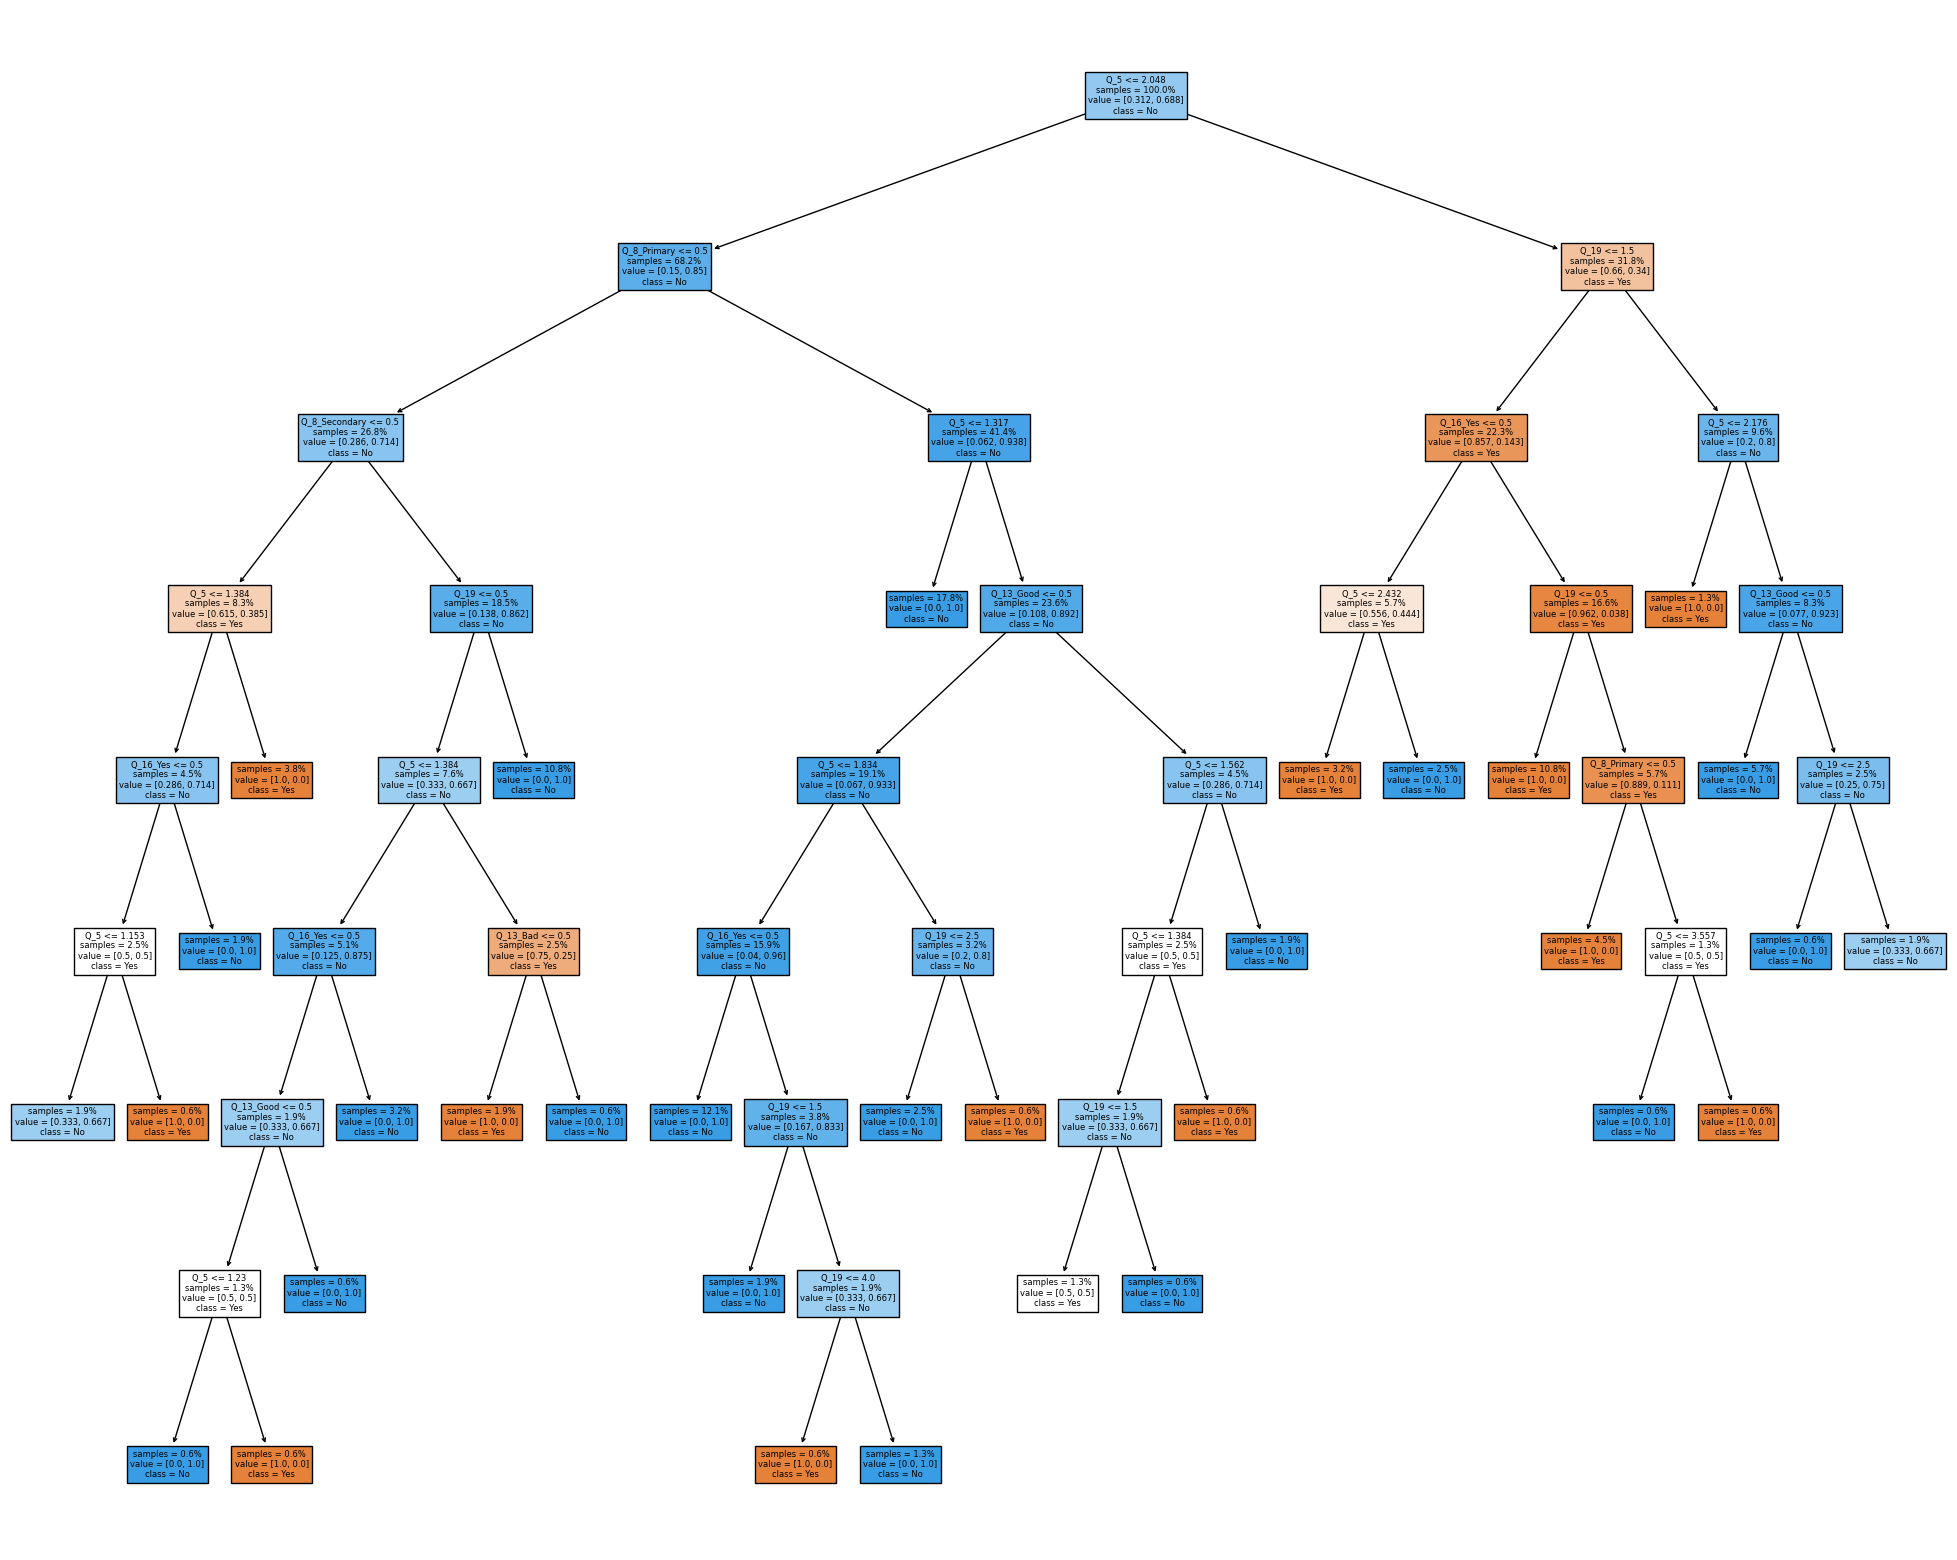

In [186]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
fig = plt.figure(figsize=((25,20)))
plot_tree(dt,
            feature_names = X_encoded.columns,
            class_names=['Yes', 'No'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.show()

In [187]:
adf = pd.DataFrame(acc_dict)
adf

,name,accuracy
0,Decision Tree,0.773585
1,SVM,0.830189
2,Random Forest,0.792453
3,LR,0.886792
4,XGB,0.867925
